# SymPy -- symbolic computation

Symbolic computation is the computation of mathematical objects in an analytical way. 
The mathematical objects are represented exactly and not only approximately. For example $\sqrt{8}$ will not approximated as $\sqrt{8} = 2.82842712475$, it will be done as:

In [2]:
import sympy as sp
sp.init_printing()
sp.sqrt(8)

Furthermore one can define expressions, equations and more 

In [36]:
x, y = sp.symbols('x y')
expr=x+3*y
print(expr)
expr+1

x + 3*y


Differentiation, Integration, computation of limits is possible:

In [4]:
sp.diff(sp.sin(x)+3*x**2+4*x,x)

In [5]:
sp.integrate(x**2*sp.exp(x),x)


In [6]:
sp.integrate(x**2*sp.exp(x),(x,0,10))


In [7]:
sp.integrate(x**2*sp.exp(x),(x,0,10)).evalf()


In [8]:
sp.limit(sp.sin(x)/x,x,0)

## Task

Differentiate, integrate some expressions of your choice and compute the limits of some series

In [9]:

expr1=sp.sqrt(sp.tan(x))
expr1

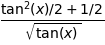

In [10]:
sp.diff(expr1)

In [11]:
sp.integrate(expr1,(x,sp.pi/6,0)).evalf()


### Floating point representation

Sometimes it is useful to let SymPy evaluate a floating point approximation (up to a user specified number of digits).


In [12]:
sp.sqrt(2).evalf(10)

## Task

Evaluate $\pi$ from sympy with hundred digits. 

Then write a functions which uses Leibniz Formula 
$$ 1 - \frac{1}{3} + \frac{1}{5} -  \frac{1}{7}  + \frac{1}{9}  + - \cdots = \frac{\pi}{4} $$
to approximate $\pi$ with $n$ summands from the formula above. Make a convergence test - how many summands you need to get $m=5$ digits of $\pi$

In [38]:
# get 100 digits of pi 
pi100=sp.pi.evalf(100)
pi100

In [44]:
def piapprox(n):
    p=0
    for i in range(n):
        p=p+(-1)**i/(2*i+1)
    return 4*p

piapprox(100000000)

In [103]:
from time import process_time 
import numpy as np

pi100=sp.pi.evalf(100)
def pi_convergence_test(m):
    n=1
    while True:
        if np.abs(pi100-piapprox(n))<0.1**(m+1):
            break
        n=n+1
    print(n , piapprox(n))

print(pi100)
startTime= process_time()
pi_convergence_test(3) #My laptop is slow for m=4,5

print("process time:", process_time()-startTime)

3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117068
10000 3.1414926535900345
process time: 34.703125


## Solving equations

Sympy can solve equations, for example roots of polynomials

In [30]:
sp.solve(-x**2+3*x+4,x)

Not all is possible in exact computation

In [31]:
sp.solve(sp.exp(x)-sp.sin(x),x)

NotImplementedError: multiple generators [exp(x), sin(x)]
No algorithms are implemented to solve equation exp(x) - sin(x)

but it can be approximated in a numerical way. Play around with different starting values.

In [32]:
sp.nsolve(sp.exp(x)-sp.sin(x),0)

It is possible to solve systems, for example the intersection of a circle and a line:


In [33]:
eq1 = x**2 + y**2 - 9  # circle of radius 3
eq2 = 2*x + y - sp.Rational(1,2)   # line y(x) = -2*x + 1/2 # rational solution
#eq2 = 2*x + y - 1/2  # try out what happens here: float

sp.solve([eq1, eq2], [x, y])


## Task

Make a geometrical interpretation to the following system of equations
$$ x^2+y^2+z^2=1 $$
$$ z=x^2+y^2 $$
$$ y=0 $$
and then solve this system, dump the solutions as expressions and as floating point numbers.
Then interprete the solutions.

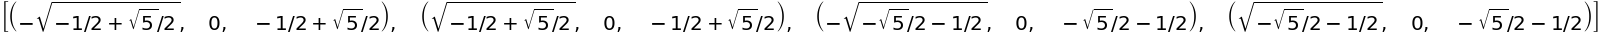

In [34]:
z=sp.symbols('z') # x and y are already symbols 

eq1=x**2+y**2+z**2-1 #
#eq1=x**2+y**2+z**2-1.0 # float
eq2=z-x**2-y**2
eq3=y
sp.solve([eq1,eq2,eq3],[x,y,z])


## Interprete the solutions:
With subistute eq3 in eq1 and eq2 we have: 
$$ x^2+z^2=1 $$  
$$ z=x^2$$
Anf from these we have $$ x^2+x^4=1. $$
This is a equation with degree 4 so it will have 4 solutions in complex number

## Task

Now define your own geometrical problem in the space $R^3$. It should have $4$ points in $R^3$ as solution.

In [109]:
# TODO
x,y,z=sp.symbols('x y z') # define symbols 

eq1=x**2-1-y 
#eq1=x**2-1.0-y 
eq2=x**2+1-z
eq3=y*z
sp.solve([eq1,eq2,eq3],[x,y,z])

## Task

Now a task for integration and solving of equations. We consider the affine linear function
$$y=m x + 1 \quad m \in R$$ 
and the parabola
$$y=(x-1)^2$$

Make a sketch of the functions (on a sheet of paper, not here) 
and then compute $m$ such that the area between the graphs of this functions is $1$.
  * Hint 1 : you need the intersection points of the functions, depending on m
  * Hint 2 : you get the area between the functions with integrals between the intersection points 
  * Hint 3 : then you have the area A(m) and can solve A(m)=1
  * Hint 4 : check your solution at the end of all with a probe

In [110]:
# TODO 
m=sp.symbols('m')
eq1=y-m*x-1
eq2=y-(x-1)**2
P=sp.solve([eq1,eq2],[x,y])
P[1][0]

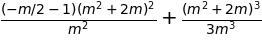

In [111]:
A=sp.integrate(eq1-eq2,[x,P[0][0],P[1][0]])
A

In [112]:
solutions=sp.solve(A-1,m)
solutions

In [113]:
s0=solutions[0]
A.subs(m,s0).evalf()

## Differential equations 

Sympy can solve differential equations like

$$u'(t)=a u(t) \qquad a \in R$$ 

which is an example for exponential growth (a>0) or exponential decay (a<0). Such equations can model 
the growth of microbes or radioactive disintegration.

In [114]:
u=sp.Function('u')
t=sp.symbols('t')
a=sp.symbols('a')
sp.dsolve(u(t).diff(t, 1) - a*u(t))

## Task 

Solve the problem for the logistic equation

$$ u'(t) = au(t) - bu^2(t) $$

and interpret the solution for $a=b=1$. Find out if there exist equilibrium states where $u(t)=const$ which is equivalent to $u'(t)=0$



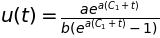

In [118]:
u=sp.Function('u')
t=sp.symbols('t')
a=sp.symbols('a')
b=sp.symbols('b')
logestic_solutions=sp.dsolve(u(t).diff(t,1)-a*u(t)+b*u(t)**2 )
logestic_solutions

In [124]:
logestic_solutions11=logestic_solutions.subs([(a,1),(b,1)])

In [125]:
sp.solve(sp.diff(logestic_solutions11,t)) # Does it wat we need?